# SCORE PREDICTOR

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway


In [ ]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [ ]:
df.shape

(1000, 8)

In [ ]:
# Describing Numberical features
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# Identify missing values to prepare for imputation or removal
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df.dtypes.value_counts()

,count
object,5
int64,3


In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print them
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Number of Numerical Columns:", len(numerical_cols))
print("Number of Categorical Columns:", len(categorical_cols))

Numerical Columns: ['math score', 'reading score', 'writing score']
Categorical Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Number of Numerical Columns: 3
Number of Categorical Columns: 5


In [ ]:
# Unique Values
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [ ]:
print("Gender Distribution:\n", df['gender'].value_counts(), "\n")
print("Race/Ethnicity Distribution:\n", df['race/ethnicity'].value_counts(), "\n")
print("Parental Education Level Distribution:\n", df['parental level of education'].value_counts(), "\n")
print("Lunch Type Distribution:\n", df['lunch'].value_counts(), "\n")
print("Test Preparation Course Distribution:\n", df['test preparation course'].value_counts(), "\n")

Gender Distribution:
 gender
female    518
male      482
Name: count, dtype: int64 

Race/Ethnicity Distribution:
 race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

Parental Education Level Distribution:
 parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

Lunch Type Distribution:
 lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

Test Preparation Course Distribution:
 test preparation course
none         642
completed    358
Name: count, dtype: int64 



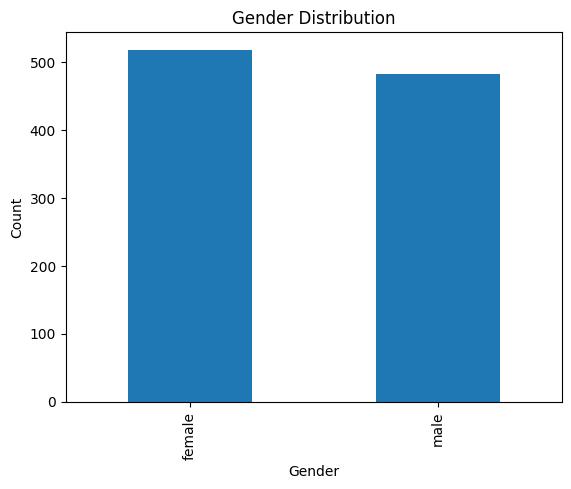

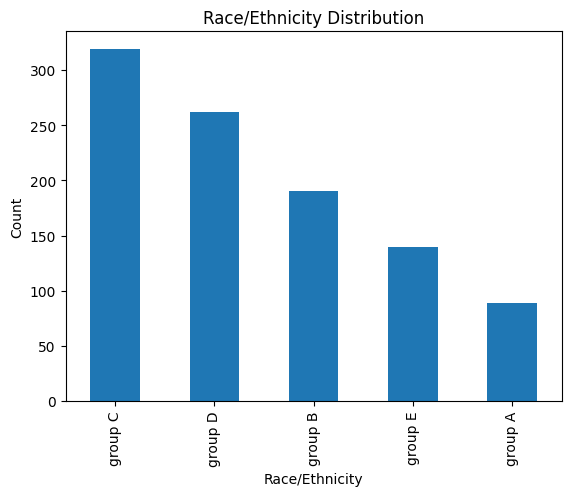

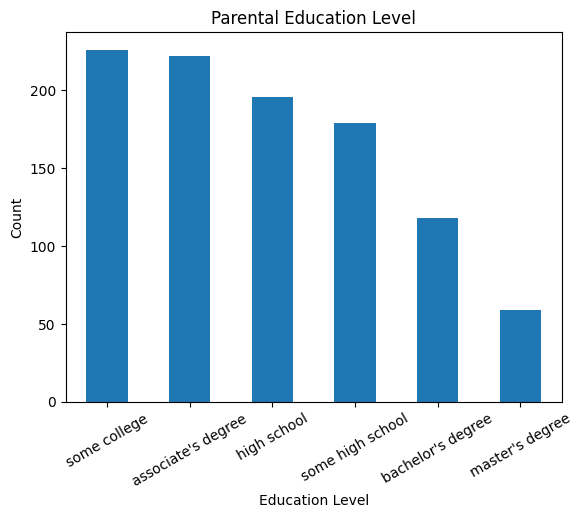

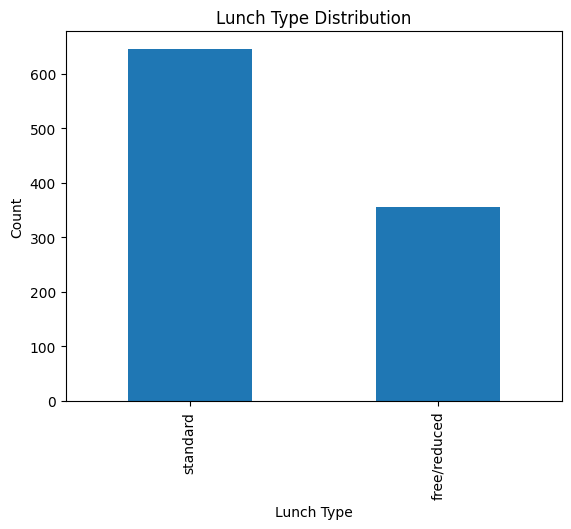

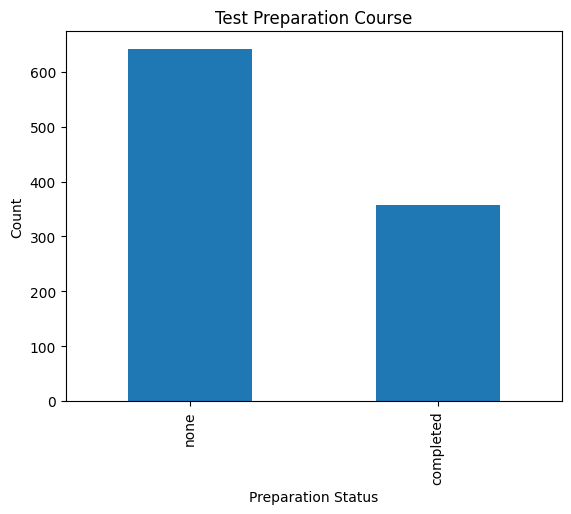

In [ ]:
df['gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

df['race/ethnicity'].value_counts().plot(kind='bar', title='Race/Ethnicity Distribution')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.show()

df['parental level of education'].value_counts().plot(kind='bar', title='Parental Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

df['lunch'].value_counts().plot(kind='bar', title='Lunch Type Distribution')
plt.xlabel('Lunch Type')
plt.ylabel('Count')
plt.show()

df['test preparation course'].value_counts().plot(kind='bar', title='Test Preparation Course')
plt.xlabel('Preparation Status')
plt.ylabel('Count')
plt.show()


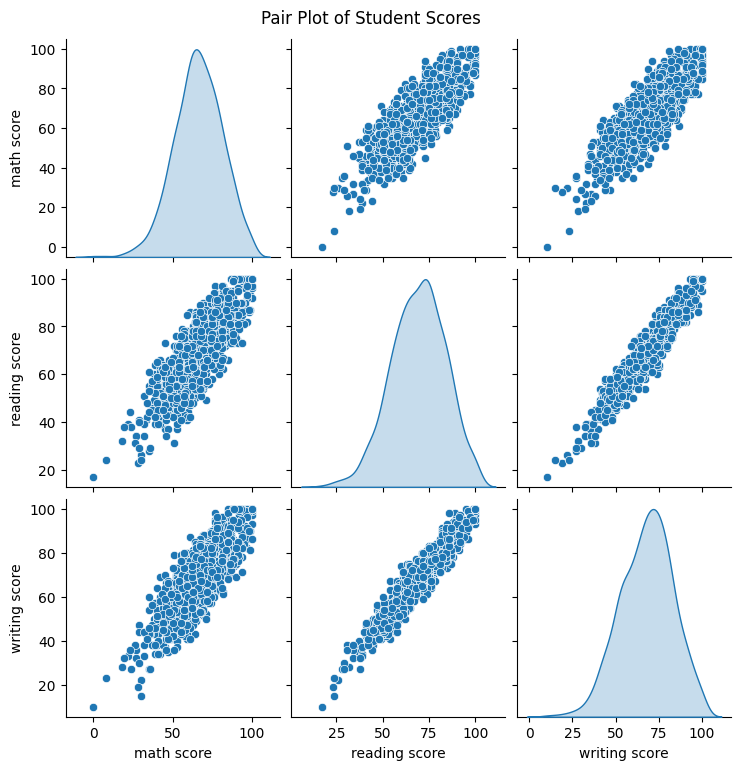

In [ ]:
sns.pairplot(df[numerical_cols], diag_kind='kde')  # Use 'hist' instead of 'kde' if needed
plt.suptitle("Pair Plot of Student Scores", y=1.02)  # optional title
plt.show()

We observe a strong linear relationship among the numerical features, suggesting potential multicollinearity between math, reading, and writing scores.

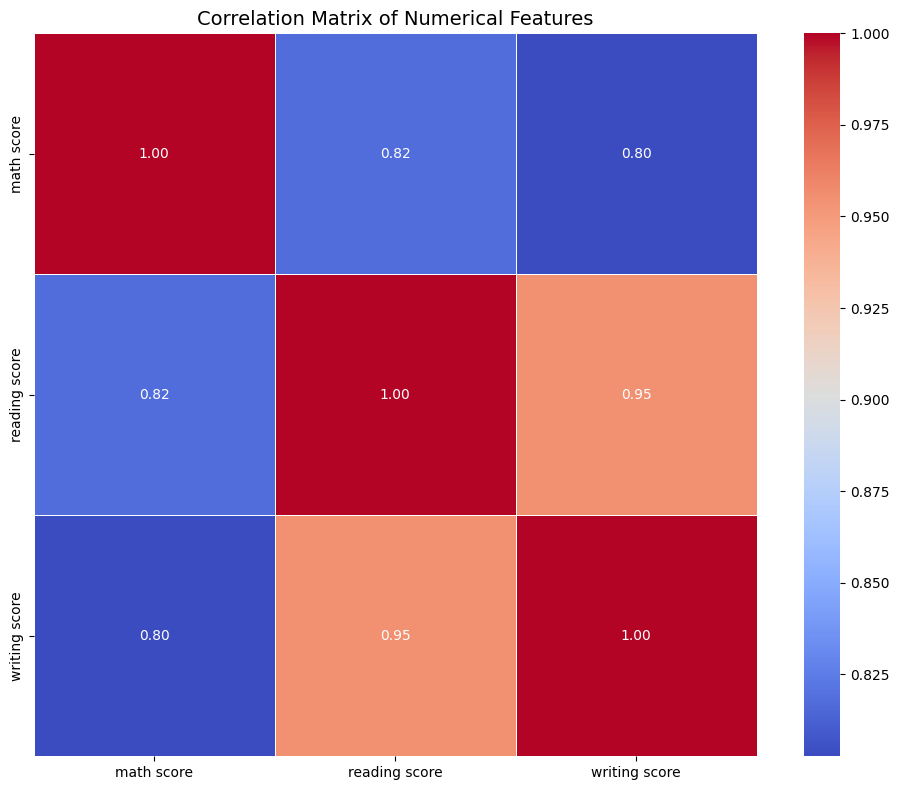

In [ ]:
# Use only numerical columns
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
target_scores = ['math score', 'reading score', 'writing score']

# Loop through each score to test impact of parental education
for score in target_scores:
    print(f"\n Testing impact on: {score}")

    # Create a list of groups based on parental education
    groups = [df[df['parental level of education'] == level][score]
              for level in df['parental level of education'].unique()]

    # Perform ANOVA
    f_stat, p_val = f_oneway(*groups)
    print(f"F-Statistic: {f_stat:.2f}, P-Value: {p_val:.4f}")

    # Interpret the result
    if p_val < 0.05:
        print("Statistically significant: Parental education impacts this score.")
    else:
        print("Not statistically significant: No strong evidence for impact.")


 Testing impact on: math score
F-Statistic: 6.52, P-Value: 0.0000
Statistically significant: Parental education impacts this score.

 Testing impact on: reading score
F-Statistic: 9.29, P-Value: 0.0000
Statistically significant: Parental education impacts this score.

 Testing impact on: writing score
F-Statistic: 14.44, P-Value: 0.0000
Statistically significant: Parental education impacts this score.


In [ ]:
# Ordinal encoding for 'parental level of education'
education_order = {
    "high school": 0,
    "some high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
df['parental_edu_encoded'] = df['parental level of education'].map(education_order)


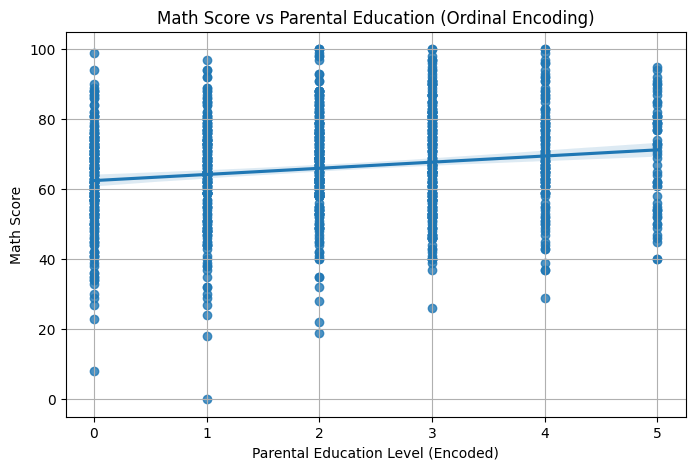

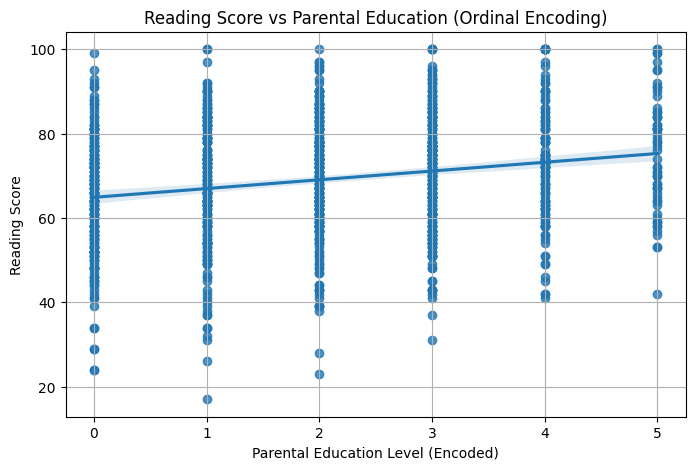

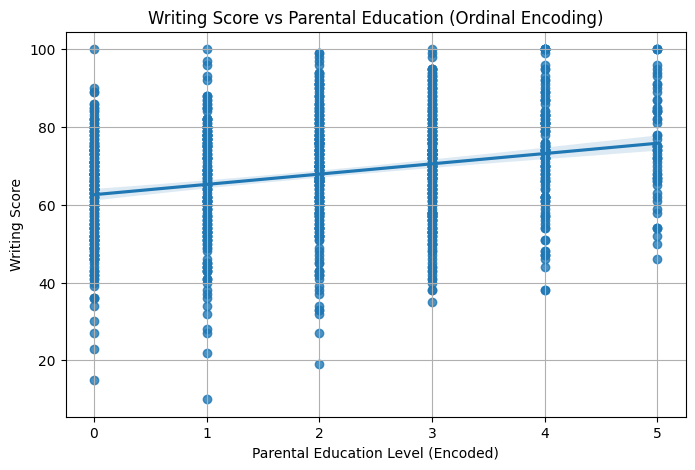

In [ ]:
score_cols = ['math score', 'reading score', 'writing score']

# Plot for each score
for score in score_cols:
    plt.figure(figsize=(8, 5))
    sns.regplot(x='parental_edu_encoded', y=score, data=df)
    plt.title(f'{score.title()} vs Parental Education (Ordinal Encoding)')
    plt.xlabel('Parental Education Level (Encoded)')
    plt.ylabel(score.title())
    plt.grid(True)
    plt.show()

In [ ]:
# Drop original column to avoid one-hot encoding it again
df = df.drop(columns='parental level of education')

# One-hot encode all other object-type columns
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
# Preview the final encoded dataset
print(df_encoded.head())
print("\nFinal Columns:", df_encoded.columns.tolist())

   math score  reading score  writing score  parental_edu_encoded  \
0          72             72             74                     4   
1          69             90             88                     2   
2          90             95             93                     5   
3          47             57             44                     3   
4          76             78             75                     2   

   gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0        False                    True                   False   
1        False                   False                    True   
2        False                    True                   False   
3         True                   False                   False   
4         True                   False                    True   

   race/ethnicity_group D  race/ethnicity_group E  lunch_standard  \
0                   False                   False            True   
1                   False                   False 

Data Preprocessing and Exploratory Data Analysis (EDA):

- Conducted an ANOVA test to examine the impact of parental level of education on student performance. The results showed a statistically significant relationship (p-value < 0.05), justifying its inclusion as a meaningful feature.

- Applied ordinal encoding to the parental level of education column based on logical educational hierarchy.

- Performed one-hot encoding on the remaining categorical features (e.g., gender, race/ethnicity, lunch type, test preparation course).

- Visualized trends using a regression plot to confirm a positive correlation between higher parental education and better student scores.



In [ ]:
pip install optuna

In [ ]:
# Imports
import os
import pandas as pd
import numpy as np
import joblib
import optuna
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, max_error
)
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [ ]:
# Target Columns
target_cols = ['math score', 'reading score', 'writing score']

# Models Dictionary
models = {
    'GradientBoosting': GradientBoostingRegressor,
    'RandomForest': RandomForestRegressor,
    'Ridge': Ridge,
    'Lasso': Lasso,
    'SVR': SVR,
    'DecisionTree': DecisionTreeRegressor,
    'XGBoost': xgb.XGBRegressor
}

# Results Storage
results = []
saved_models_info = []

# Ensure Save Directory
os.makedirs("best_saved_models", exist_ok=True)

# Main Loop
for target in target_cols:
    print(f"\nTarget: {target}")

    # Prepare X and y
    X = df_encoded.drop(columns=[target])
    y = df_encoded[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    best_r2 = -np.inf
    best_model = None
    best_model_name = ""
    best_params = {}
    best_metrics = {}

    for model_name, model_class in models.items():
        print(f"\n Optimizing {model_name}...")

        def objective(trial):
            if model_name == 'GradientBoosting':
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 50, 500),
                    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
                    'max_depth': trial.suggest_int('max_depth', 2, 10),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
                }
            elif model_name == 'RandomForest':
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 50, 500),
                    'max_depth': trial.suggest_int('max_depth', 2, 20),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
                }
            elif model_name in ['Ridge', 'Lasso']:
                params = {'alpha': trial.suggest_float('alpha', 0.001, 10.0, log=True)}
            elif model_name == 'SVR':
                params = {
                    'C': trial.suggest_float('C', 0.1, 10.0),
                    'epsilon': trial.suggest_float('epsilon', 0.01, 1.0)
                }
            elif model_name == 'DecisionTree':
                params = {
                    'max_depth': trial.suggest_int('max_depth', 2, 20),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
                }
            elif model_name == 'XGBoost':
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 50, 500),
                    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
                    'max_depth': trial.suggest_int('max_depth', 2, 10)
                }

            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model_class(**params))
            ])

            scores = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=5)
            return scores.mean()

        study = optuna.create_study(direction='maximize')
        study.optimize(objective, n_trials=50, timeout=180)

        # Refit final model pipeline
        best_params = study.best_params
        final_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model_class(**best_params))
        ])

        final_pipeline.fit(X_train, y_train)
        y_pred = final_pipeline.predict(X_test)

        # Metrics
        metrics = {
            'R²': r2_score(y_test, y_pred),
            'CV R²': cross_val_score(final_pipeline, X, y, cv=5, scoring='r2').mean(),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'Max Error': max_error(y_test, y_pred)
        }

        # Save all results
        results.append({
            'Target': target,
            'Model': model_name,
            **{k: round(v, 4) for k, v in metrics.items()},
            'Best Parameters': best_params
        })

        if metrics['R²'] > best_r2:
            best_r2 = metrics['R²']
            best_model = final_pipeline
            best_model_name = model_name
            best_params = best_params
            best_metrics = metrics

    model_file = f"best_saved_models/{target.replace(' ', '_')}_{best_model_name}.pkl"
    joblib.dump(best_model, model_file)

    saved_models_info.append({
        'Target': target,
        'Model': best_model_name,
        'Model File': model_file,
        **{k: round(v, 4) for k, v in best_metrics.items()},
        'Best Parameters': best_params
    })

# --- Save Summary CSVs ---
pd.DataFrame(results).to_csv("all_models_results.csv", index=False)
pd.DataFrame(saved_models_info).to_csv("saved_best_models_info.csv", index=False)

print("\nAll models evaluated and best models saved with pipelines!")


[I 2025-06-21 07:41:29,754] A new study created in memory with name: no-name-2cd49ae2-d147-42ca-b785-786419e8827c



Target: math score

 Optimizing GradientBoosting...


[I 2025-06-21 07:41:33,436] Trial 0 finished with value: 0.8290246644321766 and parameters: {'n_estimators': 390, 'learning_rate': 0.15642452724813272, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8290246644321766.
[I 2025-06-21 07:41:34,432] Trial 1 finished with value: 0.7883116934711999 and parameters: {'n_estimators': 57, 'learning_rate': 0.47549977693831297, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8290246644321766.
[I 2025-06-21 07:41:35,124] Trial 2 finished with value: 0.8226284443295195 and parameters: {'n_estimators': 51, 'learning_rate': 0.11274127003057342, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8290246644321766.
[I 2025-06-21 07:41:39,397] Trial 3 finished with value: 0.7866088894540197 and parameters: {'n_estimators': 482, 'learning_rate': 0.4625158374784145, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf'


 Optimizing RandomForest...


[I 2025-06-21 07:43:39,247] Trial 0 finished with value: 0.8388946401453519 and parameters: {'n_estimators': 151, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8388946401453519.
[I 2025-06-21 07:43:43,904] Trial 1 finished with value: 0.6264151455294379 and parameters: {'n_estimators': 471, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8388946401453519.
[I 2025-06-21 07:43:48,799] Trial 2 finished with value: 0.8420660857143345 and parameters: {'n_estimators': 394, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.8420660857143345.
[I 2025-06-21 07:43:54,222] Trial 3 finished with value: 0.8408196374161937 and parameters: {'n_estimators': 467, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.8420660857143345.
[I 2025-06-21 07:43:55,812] Trial 4 finished with value: 0.8400858150619266 and parameters: 


 Optimizing Ridge...


[I 2025-06-21 07:46:29,073] Trial 1 finished with value: 0.8699392751716569 and parameters: {'alpha': 0.28060216287623263}. Best is trial 0 with value: 0.8699402516623967.
[I 2025-06-21 07:46:29,169] Trial 2 finished with value: 0.8697690042999939 and parameters: {'alpha': 4.015238134312605}. Best is trial 0 with value: 0.8699402516623967.
[I 2025-06-21 07:46:29,259] Trial 3 finished with value: 0.8699394604693703 and parameters: {'alpha': 0.2544356940081197}. Best is trial 0 with value: 0.8699402516623967.
[I 2025-06-21 07:46:29,344] Trial 4 finished with value: 0.8696102912552302 and parameters: {'alpha': 5.904470763249458}. Best is trial 0 with value: 0.8699402516623967.
[I 2025-06-21 07:46:29,429] Trial 5 finished with value: 0.8699396061527155 and parameters: {'alpha': 0.2317604165943652}. Best is trial 0 with value: 0.8699402516623967.
[I 2025-06-21 07:46:29,487] Trial 6 finished with value: 0.8699402853053412 and parameters: {'alpha': 0.003529395094301622}. Best is trial 6 with 


 Optimizing Lasso...


[I 2025-06-21 07:46:32,406] Trial 2 finished with value: 0.8676681840167928 and parameters: {'alpha': 0.23250284987381203}. Best is trial 0 with value: 0.8699505038815634.
[I 2025-06-21 07:46:32,474] Trial 3 finished with value: 0.8668686627738508 and parameters: {'alpha': 0.27273782002026703}. Best is trial 0 with value: 0.8699505038815634.
[I 2025-06-21 07:46:32,533] Trial 4 finished with value: 0.8699685754782926 and parameters: {'alpha': 0.009355097413702608}. Best is trial 4 with value: 0.8699685754782926.
[I 2025-06-21 07:46:32,596] Trial 5 finished with value: 0.8699665160452215 and parameters: {'alpha': 0.008518781871802017}. Best is trial 4 with value: 0.8699685754782926.
[I 2025-06-21 07:46:32,657] Trial 6 finished with value: 0.8698985567374761 and parameters: {'alpha': 0.04818571057102027}. Best is trial 4 with value: 0.8699685754782926.
[I 2025-06-21 07:46:32,708] Trial 7 finished with value: 0.8397033685475656 and parameters: {'alpha': 1.0927658130050582}. Best is trial 4


 Optimizing SVR...


[I 2025-06-21 07:46:35,773] Trial 0 finished with value: 0.8236358642791313 and parameters: {'C': 4.303109942497767, 'epsilon': 0.019701590999713463}. Best is trial 0 with value: 0.8236358642791313.
[I 2025-06-21 07:46:36,025] Trial 1 finished with value: 0.834652475981269 and parameters: {'C': 6.191339745813622, 'epsilon': 0.6588775333411858}. Best is trial 1 with value: 0.834652475981269.
[I 2025-06-21 07:46:36,279] Trial 2 finished with value: 0.8419522325744413 and parameters: {'C': 9.418882063231164, 'epsilon': 0.8583694428407612}. Best is trial 2 with value: 0.8419522325744413.
[I 2025-06-21 07:46:36,491] Trial 3 finished with value: 0.8283929618366607 and parameters: {'C': 4.794591977404208, 'epsilon': 0.8979168415837716}. Best is trial 2 with value: 0.8419522325744413.
[I 2025-06-21 07:46:36,737] Trial 4 finished with value: 0.834074207088962 and parameters: {'C': 6.117679863570306, 'epsilon': 0.5333688666183937}. Best is trial 2 with value: 0.8419522325744413.
[I 2025-06-21 07


 Optimizing DecisionTree...


[I 2025-06-21 07:46:50,026] Trial 3 finished with value: 0.7751317782503822 and parameters: {'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.7944604510448119.
[I 2025-06-21 07:46:50,085] Trial 4 finished with value: 0.7816640190591798 and parameters: {'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.7944604510448119.
[I 2025-06-21 07:46:50,157] Trial 5 finished with value: 0.7596291137682047 and parameters: {'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.7944604510448119.
[I 2025-06-21 07:46:50,215] Trial 6 finished with value: 0.7832938985377207 and parameters: {'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.7944604510448119.
[I 2025-06-21 07:46:50,268] Trial 7 finished with value: 0.7829893630597972 and parameters: {'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 2 wit


 Optimizing XGBoost...


[I 2025-06-21 07:46:55,770] Trial 0 finished with value: 0.7989576578140258 and parameters: {'n_estimators': 188, 'learning_rate': 0.0958685615272882, 'max_depth': 9}. Best is trial 0 with value: 0.7989576578140258.
[I 2025-06-21 07:46:56,331] Trial 1 finished with value: 0.7909748077392578 and parameters: {'n_estimators': 70, 'learning_rate': 0.30043632056196823, 'max_depth': 10}. Best is trial 0 with value: 0.7989576578140258.
[I 2025-06-21 07:46:57,108] Trial 2 finished with value: 0.7969120621681214 and parameters: {'n_estimators': 214, 'learning_rate': 0.15291037709437763, 'max_depth': 7}. Best is trial 0 with value: 0.7989576578140258.
[I 2025-06-21 07:46:57,371] Trial 3 finished with value: 0.841888177394867 and parameters: {'n_estimators': 155, 'learning_rate': 0.1870654079145164, 'max_depth': 3}. Best is trial 3 with value: 0.841888177394867.
[I 2025-06-21 07:46:57,560] Trial 4 finished with value: 0.8493077993392945 and parameters: {'n_estimators': 86, 'learning_rate': 0.1667


Target: reading score

 Optimizing GradientBoosting...


[I 2025-06-21 07:47:22,615] Trial 0 finished with value: 0.8898741585525312 and parameters: {'n_estimators': 75, 'learning_rate': 0.06585777305436903, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8898741585525312.
[I 2025-06-21 07:47:25,575] Trial 1 finished with value: 0.8909200760416558 and parameters: {'n_estimators': 482, 'learning_rate': 0.16303184539381405, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8909200760416558.
[I 2025-06-21 07:47:28,978] Trial 2 finished with value: 0.873200384193419 and parameters: {'n_estimators': 256, 'learning_rate': 0.036051749654335594, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.8909200760416558.
[I 2025-06-21 07:47:33,404] Trial 3 finished with value: 0.8631539670291508 and parameters: {'n_estimators': 305, 'learning_rate': 0.46753065668643795, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_lea


 Optimizing RandomForest...


[I 2025-06-21 07:49:04,905] Trial 0 finished with value: 0.906691540169579 and parameters: {'n_estimators': 251, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.906691540169579.
[I 2025-06-21 07:49:10,606] Trial 1 finished with value: 0.9078704235772307 and parameters: {'n_estimators': 487, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9078704235772307.
[I 2025-06-21 07:49:14,520] Trial 2 finished with value: 0.9082933974689332 and parameters: {'n_estimators': 298, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.9082933974689332.
[I 2025-06-21 07:49:16,089] Trial 3 finished with value: 0.9077590872999048 and parameters: {'n_estimators': 117, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.9082933974689332.
[I 2025-06-21 07:49:21,430] Trial 4 finished with value: 0.908446560070648 and parameters: {'n_


 Optimizing Ridge...


[I 2025-06-21 07:51:22,915] Trial 3 finished with value: 0.9244015948724783 and parameters: {'alpha': 1.7321225523878399}. Best is trial 0 with value: 0.9244091704232114.
[I 2025-06-21 07:51:22,971] Trial 4 finished with value: 0.9244128606120897 and parameters: {'alpha': 0.37756072862118084}. Best is trial 4 with value: 0.9244128606120897.
[I 2025-06-21 07:51:23,027] Trial 5 finished with value: 0.9244084957055761 and parameters: {'alpha': 0.062214759583120824}. Best is trial 4 with value: 0.9244128606120897.
[I 2025-06-21 07:51:23,081] Trial 6 finished with value: 0.9238174522210569 and parameters: {'alpha': 8.76624687460072}. Best is trial 4 with value: 0.9244128606120897.
[I 2025-06-21 07:51:23,136] Trial 7 finished with value: 0.9244142969104938 and parameters: {'alpha': 0.8326280023784272}. Best is trial 7 with value: 0.9244142969104938.
[I 2025-06-21 07:51:23,191] Trial 8 finished with value: 0.9243329940295348 and parameters: {'alpha': 3.3655636708692165}. Best is trial 7 with 


 Optimizing Lasso...


[I 2025-06-21 07:51:25,939] Trial 3 finished with value: 0.9177315552791994 and parameters: {'alpha': 0.44494535534340773}. Best is trial 0 with value: 0.924407469062998.
[I 2025-06-21 07:51:25,994] Trial 4 finished with value: 0.9240718609614165 and parameters: {'alpha': 0.09992685302074254}. Best is trial 0 with value: 0.924407469062998.
[I 2025-06-21 07:51:26,051] Trial 5 finished with value: 0.9244059625958068 and parameters: {'alpha': 0.0037746015419486685}. Best is trial 0 with value: 0.924407469062998.
[I 2025-06-21 07:51:26,113] Trial 6 finished with value: 0.9244074541092935 and parameters: {'alpha': 0.00135281450152663}. Best is trial 0 with value: 0.924407469062998.
[I 2025-06-21 07:51:26,171] Trial 7 finished with value: 0.9244056234080503 and parameters: {'alpha': 0.00398566064156684}. Best is trial 0 with value: 0.924407469062998.
[I 2025-06-21 07:51:26,233] Trial 8 finished with value: 0.8684310228169629 and parameters: {'alpha': 3.0652202406073337}. Best is trial 0 with


 Optimizing SVR...


[I 2025-06-21 07:51:29,064] Trial 0 finished with value: 0.8941995998427771 and parameters: {'C': 5.580300988163217, 'epsilon': 0.19067870532991163}. Best is trial 0 with value: 0.8941995998427771.
[I 2025-06-21 07:51:29,301] Trial 1 finished with value: 0.8946540943674022 and parameters: {'C': 5.583757430657875, 'epsilon': 0.4207895693684251}. Best is trial 1 with value: 0.8946540943674022.
[I 2025-06-21 07:51:29,504] Trial 2 finished with value: 0.8754266990989761 and parameters: {'C': 2.9826381648952136, 'epsilon': 0.8811510955149148}. Best is trial 1 with value: 0.8946540943674022.
[I 2025-06-21 07:51:29,707] Trial 3 finished with value: 0.743542805696672 and parameters: {'C': 0.6322757166313618, 'epsilon': 0.9605952246496776}. Best is trial 1 with value: 0.8946540943674022.
[I 2025-06-21 07:51:29,925] Trial 4 finished with value: 0.8746784340441014 and parameters: {'C': 2.961259290645378, 'epsilon': 0.6547802426104651}. Best is trial 1 with value: 0.8946540943674022.
[I 2025-06-21


 Optimizing DecisionTree...


[I 2025-06-21 07:51:43,532] Trial 3 finished with value: 0.8894781275844149 and parameters: {'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.8894781275844149.
[I 2025-06-21 07:51:43,592] Trial 4 finished with value: 0.8830970443911139 and parameters: {'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.8894781275844149.
[I 2025-06-21 07:51:43,653] Trial 5 finished with value: 0.861524945736073 and parameters: {'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.8894781275844149.
[I 2025-06-21 07:51:43,715] Trial 6 finished with value: 0.8400419997673605 and parameters: {'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.8894781275844149.
[I 2025-06-21 07:51:43,778] Trial 7 finished with value: 0.8593696064533699 and parameters: {'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 3 with


 Optimizing XGBoost...


[I 2025-06-21 07:51:48,528] Trial 0 finished with value: 0.8794052004814148 and parameters: {'n_estimators': 103, 'learning_rate': 0.3317217501965625, 'max_depth': 10}. Best is trial 0 with value: 0.8794052004814148.
[I 2025-06-21 07:51:48,912] Trial 1 finished with value: 0.9039300322532654 and parameters: {'n_estimators': 314, 'learning_rate': 0.19697865658130945, 'max_depth': 2}. Best is trial 1 with value: 0.9039300322532654.
[I 2025-06-21 07:51:49,174] Trial 2 finished with value: 0.8999019026756286 and parameters: {'n_estimators': 116, 'learning_rate': 0.15643311186599818, 'max_depth': 4}. Best is trial 1 with value: 0.9039300322532654.
[I 2025-06-21 07:51:49,731] Trial 3 finished with value: 0.8858813166618347 and parameters: {'n_estimators': 185, 'learning_rate': 0.10304723246720288, 'max_depth': 6}. Best is trial 1 with value: 0.9039300322532654.
[I 2025-06-21 07:51:50,427] Trial 4 finished with value: 0.8738504886627197 and parameters: {'n_estimators': 286, 'learning_rate': 0


Target: writing score

 Optimizing GradientBoosting...


[I 2025-06-21 07:52:23,196] Trial 0 finished with value: 0.9195977892558783 and parameters: {'n_estimators': 267, 'learning_rate': 0.43472732236042283, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9195977892558783.
[I 2025-06-21 07:52:28,208] Trial 1 finished with value: 0.91586948226232 and parameters: {'n_estimators': 369, 'learning_rate': 0.47210324261577497, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9195977892558783.
[I 2025-06-21 07:52:30,290] Trial 2 finished with value: 0.9256786775100283 and parameters: {'n_estimators': 219, 'learning_rate': 0.10780021087703172, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.9256786775100283.
[I 2025-06-21 07:52:33,647] Trial 3 finished with value: 0.9235689898964827 and parameters: {'n_estimators': 371, 'learning_rate': 0.12472067537364505, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_lea


 Optimizing RandomForest...


[I 2025-06-21 07:53:57,344] Trial 0 finished with value: 0.9188471170090219 and parameters: {'n_estimators': 196, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9188471170090219.
[I 2025-06-21 07:53:59,985] Trial 1 finished with value: 0.9283807027520409 and parameters: {'n_estimators': 217, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9283807027520409.
[I 2025-06-21 07:54:01,288] Trial 2 finished with value: 0.9277922089431618 and parameters: {'n_estimators': 106, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9283807027520409.
[I 2025-06-21 07:54:04,432] Trial 3 finished with value: 0.928419317730959 and parameters: {'n_estimators': 222, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.928419317730959.
[I 2025-06-21 07:54:08,378] Trial 4 finished with value: 0.9273219307546828 and parameters: {'n_


 Optimizing Ridge...


[I 2025-06-21 07:57:04,030] Trial 1 finished with value: 0.9472271664690061 and parameters: {'alpha': 0.4487303840187927}. Best is trial 1 with value: 0.9472271664690061.
[I 2025-06-21 07:57:04,118] Trial 2 finished with value: 0.947224083958276 and parameters: {'alpha': 0.0025856678145175483}. Best is trial 1 with value: 0.9472271664690061.
[I 2025-06-21 07:57:04,218] Trial 3 finished with value: 0.9472242540333946 and parameters: {'alpha': 0.02485316021802026}. Best is trial 1 with value: 0.9472271664690061.
[I 2025-06-21 07:57:04,300] Trial 4 finished with value: 0.9472243081654452 and parameters: {'alpha': 0.03198815967945425}. Best is trial 1 with value: 0.9472271664690061.
[I 2025-06-21 07:57:04,379] Trial 5 finished with value: 0.9472240823130875 and parameters: {'alpha': 0.0023713621472024964}. Best is trial 1 with value: 0.9472271664690061.
[I 2025-06-21 07:57:04,457] Trial 6 finished with value: 0.9472243118387617 and parameters: {'alpha': 0.03247317383037275}. Best is trial 


 Optimizing Lasso...


[I 2025-06-21 07:57:08,146] Trial 3 finished with value: 0.9472440992348071 and parameters: {'alpha': 0.028415290704336335}. Best is trial 3 with value: 0.9472440992348071.
[I 2025-06-21 07:57:08,207] Trial 4 finished with value: 0.845588515963772 and parameters: {'alpha': 3.8824734374236236}. Best is trial 3 with value: 0.9472440992348071.
[I 2025-06-21 07:57:08,261] Trial 5 finished with value: 0.8927268048001533 and parameters: {'alpha': 2.080552404167857}. Best is trial 3 with value: 0.9472440992348071.
[I 2025-06-21 07:57:08,318] Trial 6 finished with value: 0.9472423504086696 and parameters: {'alpha': 0.016613303030442915}. Best is trial 3 with value: 0.9472440992348071.
[I 2025-06-21 07:57:08,374] Trial 7 finished with value: 0.9472397783128068 and parameters: {'alpha': 0.01211028889138307}. Best is trial 3 with value: 0.9472440992348071.
[I 2025-06-21 07:57:08,434] Trial 8 finished with value: 0.947233098639377 and parameters: {'alpha': 0.004718916828291688}. Best is trial 3 wi


 Optimizing SVR...


[I 2025-06-21 07:57:11,371] Trial 0 finished with value: 0.9155823572422473 and parameters: {'C': 3.9887953340420914, 'epsilon': 0.5909111349492244}. Best is trial 0 with value: 0.9155823572422473.
[I 2025-06-21 07:57:11,620] Trial 1 finished with value: 0.9209005200916401 and parameters: {'C': 5.487104719295931, 'epsilon': 0.31642575880569157}. Best is trial 1 with value: 0.9209005200916401.
[I 2025-06-21 07:57:11,877] Trial 2 finished with value: 0.9229082025398949 and parameters: {'C': 5.728018903447387, 'epsilon': 0.7697894405332912}. Best is trial 2 with value: 0.9229082025398949.
[I 2025-06-21 07:57:12,061] Trial 3 finished with value: 0.8599648953347325 and parameters: {'C': 1.0186317498323403, 'epsilon': 0.9078894246506521}. Best is trial 2 with value: 0.9229082025398949.
[I 2025-06-21 07:57:12,288] Trial 4 finished with value: 0.9199166863039295 and parameters: {'C': 4.819038942883341, 'epsilon': 0.9124697563719117}. Best is trial 2 with value: 0.9229082025398949.
[I 2025-06-2


 Optimizing DecisionTree...


[I 2025-06-21 07:57:26,109] Trial 2 finished with value: 0.8912013292857992 and parameters: {'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.892826510870211.
[I 2025-06-21 07:57:26,187] Trial 3 finished with value: 0.8944622497809827 and parameters: {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.8944622497809827.
[I 2025-06-21 07:57:26,262] Trial 4 finished with value: 0.8821421985760246 and parameters: {'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.8944622497809827.
[I 2025-06-21 07:57:26,325] Trial 5 finished with value: 0.8994321084916297 and parameters: {'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 5 with value: 0.8994321084916297.
[I 2025-06-21 07:57:26,398] Trial 6 finished with value: 0.8950095867225778 and parameters: {'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 5 with v


 Optimizing XGBoost...


[I 2025-06-21 07:57:31,737] Trial 0 finished with value: 0.9247936129570007 and parameters: {'n_estimators': 94, 'learning_rate': 0.2986223152496715, 'max_depth': 5}. Best is trial 0 with value: 0.9247936129570007.
[I 2025-06-21 07:57:32,965] Trial 1 finished with value: 0.9158299565315247 and parameters: {'n_estimators': 88, 'learning_rate': 0.3031655222469259, 'max_depth': 10}. Best is trial 0 with value: 0.9247936129570007.
[I 2025-06-21 07:57:33,414] Trial 2 finished with value: 0.9144096612930298 and parameters: {'n_estimators': 102, 'learning_rate': 0.37410486976070556, 'max_depth': 7}. Best is trial 0 with value: 0.9247936129570007.
[I 2025-06-21 07:57:33,607] Trial 3 finished with value: 0.9348101496696473 and parameters: {'n_estimators': 65, 'learning_rate': 0.19422546014222525, 'max_depth': 3}. Best is trial 3 with value: 0.9348101496696473.
[I 2025-06-21 07:57:33,949] Trial 4 finished with value: 0.8757270574569702 and parameters: {'n_estimators': 135, 'learning_rate': 0.012


All models evaluated and best models saved with pipelines!


HOW TO USE AN ALREADY EXISTING MODEL

In [33]:
#  Imports
import pandas as pd
import joblib

#  Raw Input
input_data = pd.DataFrame([{
    'gender': 'female',
    'race/ethnicity': 'group B',
    'lunch': 'standard',
    'test preparation course': 'completed',
    'parental level of education': "master's degree",
    'reading score': 77,
    'writing score': 80
}])

# Encode parental education
education_order = {
    "high school": 0,
    "some high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
input_data['parental_edu_encoded'] = input_data['parental level of education'].map(education_order)
input_data = input_data.drop(columns='parental level of education')

# One-hot encoding: match structure during training
# Use training dataset to ensure proper column order
df_train = pd.read_csv("StudentsPerformance.csv")
df_train['parental_edu_encoded'] = df_train['parental level of education'].map(education_order)
df_train = df_train.drop(columns='parental level of education')

# Drop target column for features
X_train = df_train.drop(columns=['math score'])  # drop this, keep others
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Encode input similarly
input_encoded = pd.get_dummies(input_data, drop_first=True)
input_encoded = input_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Load pipeline model
model_path = "best_saved_models/math_score_Lasso.pkl"
pipeline = joblib.load(model_path)

# Predict
predicted_score = pipeline.predict(input_encoded)[0]
print(f"Predicted Math Score: {predicted_score:.2f}")


Predicted Math Score: 64.38
